In [4]:
import pandas as pd
import numpy as np

In [5]:
x=pd.read_csv('x.csv')
y=pd.read_csv('y.csv')

In [6]:
x=pd.read_csv

In [9]:
y=pd.DataFrame.to_numpy(y)

In [10]:
print(y.shape)

(399, 2)


In [11]:
y=y[:398,0]

In [12]:
print(y.shape)

(398,)


In [13]:
x=pd.DataFrame.to_numpy(x)

AttributeError: 'function' object has no attribute 'values'

In [14]:
x=x[:398,:]

TypeError: 'function' object is not subscriptable

In [46]:
print(x.shape)

(398, 2)


Visualisation

In [50]:
import matplotlib.pyplot as plt

In [61]:
plt.style.use('seaborn-pastel')

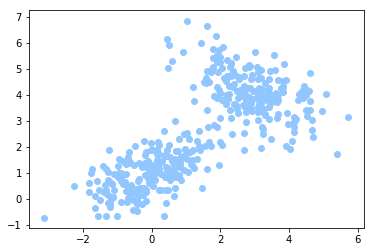

In [63]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [94]:
x_test=np.array([-2,3])

KNN Algorithm

In [2]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,query,k=5):
    val = []
    m=x.shape[0]
    for i in range(m):
        d=dist(x[i],query)
        val.append((d,y[i]))
        val=sorted(val)
        val=val[:k]
    val=np.array(val)
   
    new_val=np.unique(val[:,1],return_counts=True)
    index=new_val[1].argmax()
    pred=new_val[0][index]
    print(new_val)    
    return pred
     

In [3]:
print(dist(x,x_test))

NameError: name 'x' is not defined

In [97]:
print(knn(x,y,x_test))

(array([1.]), array([5], dtype=int64))
1.0


In [84]:
np.argmax?

In [7]:
import cv2

In [8]:
file_name=input("Enter persons name")
cap = cv2.VideoCapture(0)
skip=0
face_data=[]
dataset_path='./data/'
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
while True:
    ret,frame=cap.read() # ret represents the state of operation that is frame is captured properly or not
    if ret== False:
        continue
    faces=face_cascade.detectMultiScale(frame,1.3,5)
    faces=sorted(faces,key=lambda f:f[2]*f[3])

    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    for face in faces[-1:]:
        x,y,w,h=face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        #print((x,y,w,h))
        # Extracting face from image
        offset=10
        face_section=frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section=cv2.resize(face_section,(100,100))
        
        skip+=1
        if skip%10==0:
            face_data.append(face_section)
            print(len(face_data))
    cv2.imshow("Video Frame",frame)
    #cv2.imshow("Face Section",face_section)
    
    # wait for user input if q is pressed terminate
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed==ord('q'):
        break
# Convert our face list into numpy array
face_data=np.asarray(face_data)
face_data=face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)

# Save this data into file system
np.save(dataset_path+file_name+'.npy',face_data)
cap.release()
cv2.destroyAllWindows()

Enter persons nameApoorva
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
(22, 30000)


In [3]:
cv2.CascadeClassifier?